In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#### dataset path

In [2]:
file_path="/home/age/KAIM-Projects/data/togo-dapaong_qc.csv"

In [3]:
df = pd.read_csv(file_path)


In [4]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
null_counts =df.isnull().sum()
null_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
high_null = null_counts[null_counts/len(df) > 0.05]
high_null

Comments    525600
dtype: int64

In [9]:
df['GHI']=df['GHI'].apply(lambda x: x if x>0 else 0)
df['DNI']=df['DNI'].apply(lambda x: x if x>0 else 0)
df['DHI']=df['DHI'].apply(lambda x: x if x>0 else 0)

In [10]:
check_outlier =['GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust']
z_scores= df[check_outlier].apply(zscore)
outlier_flags = (z_scores.abs()>3).any(axis=1)

outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [11]:
outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [12]:
df.shape

(525600, 19)

In [13]:
df_clean=df[~outlier_flags].reset_index(drop=True)

In [14]:
df_clean.shape

(516343, 19)

In [15]:
df_clean=df_clean.dropna( axis=1)

In [16]:
df_clean.to_csv('../data/togo_clean.csv', index=False)

#### Data visualization for Cleaned Data

In [17]:
benin = pd.read_csv('../data/togo_clean.csv',parse_dates=['Timestamp'])
benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


In [18]:
benin['Timestamp']= pd.to_datetime(benin['Timestamp'])


In [19]:
benin['Hour'] = benin['Timestamp'].dt.hour
benin['Day'] = benin['Timestamp'].dt.date
benin['Month'] = benin['Timestamp'].dt.month

In [20]:
daily_avg = benin.groupby('Hour')[['GHI', 'DNI', 'DHI','Tamb']].mean()

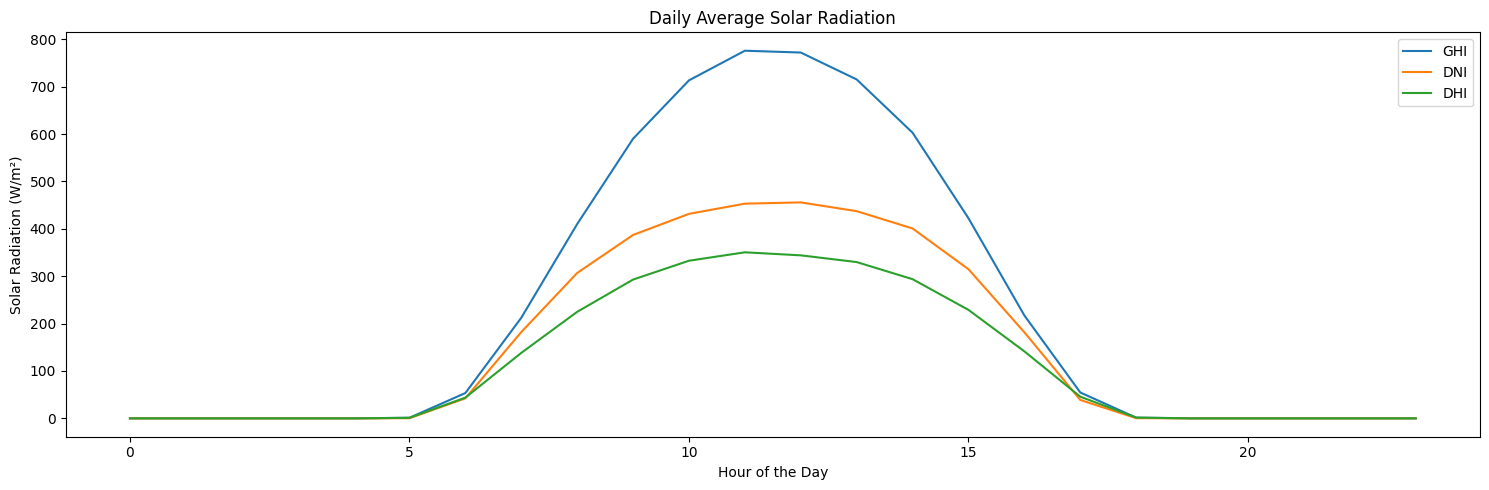

In [21]:
plt.figure(figsize=(15, 5))
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(daily_avg.index, daily_avg[col], label=col)
plt.title('Daily Average Solar Radiation')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/togo_daily_avg_solar_radiation.png')
plt.show()

## Key Solar Radiation Patterns
###### Peak Sun Hours: The highest radiation occurs around midday (~12 PM–2 PM), typical for most locations.

###### GHI Curve: Follows a bell-shaped pattern, peaking at noon when the sun is highest.

##### DMI vs. DHI:

###### DMI is high when skies are clear (direct sunlight dominates).

###### DHI increases if there’s cloud cover or atmospheric scattering.

##### Sunrise/Sunset Effects:

###### Low GHI/DHI in early morning/late evening (sun is low).

###### DMI drops sharply near sunrise/sunset (direct sunlight angle becomes unfavorable).

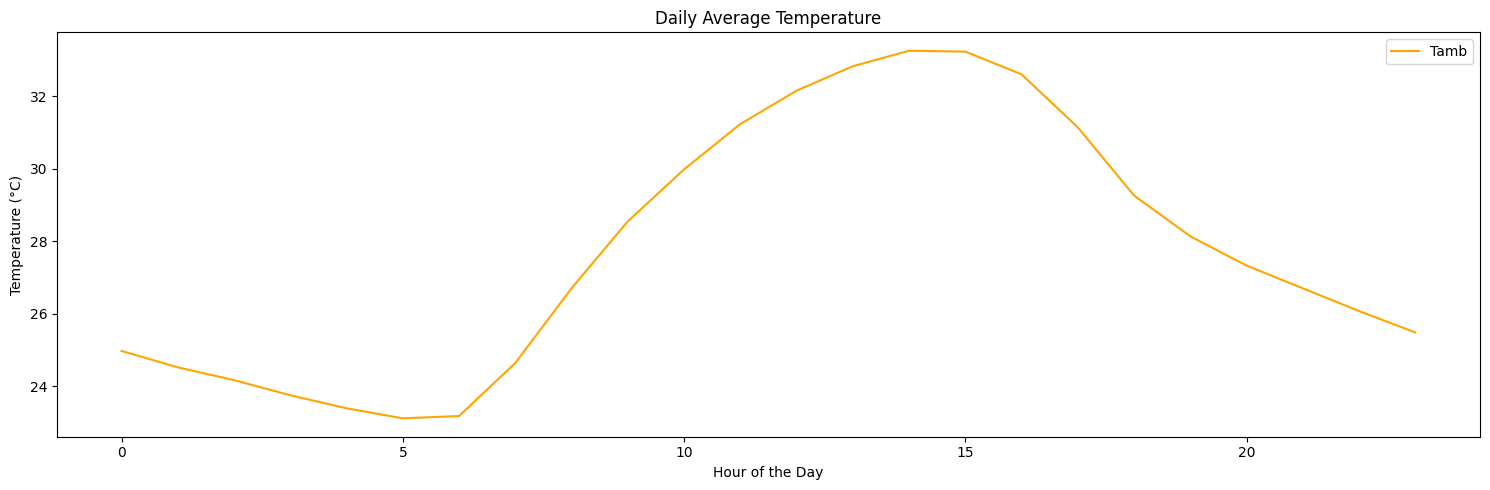

In [22]:
plt.figure(figsize=(15, 5))

plt.plot(daily_avg.index, daily_avg['Tamb'], label='Tamb', color='orange')
plt.title('Daily Average Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/togo_daily_avg_temperature.png')
plt.show()

###### Diurnal Cycle: The curve follows the expected daily temperature variation:

In [23]:
monthly_avg = benin.groupby('Month')[['GHI', 'DNI', 'DHI','Tamb']].mean()


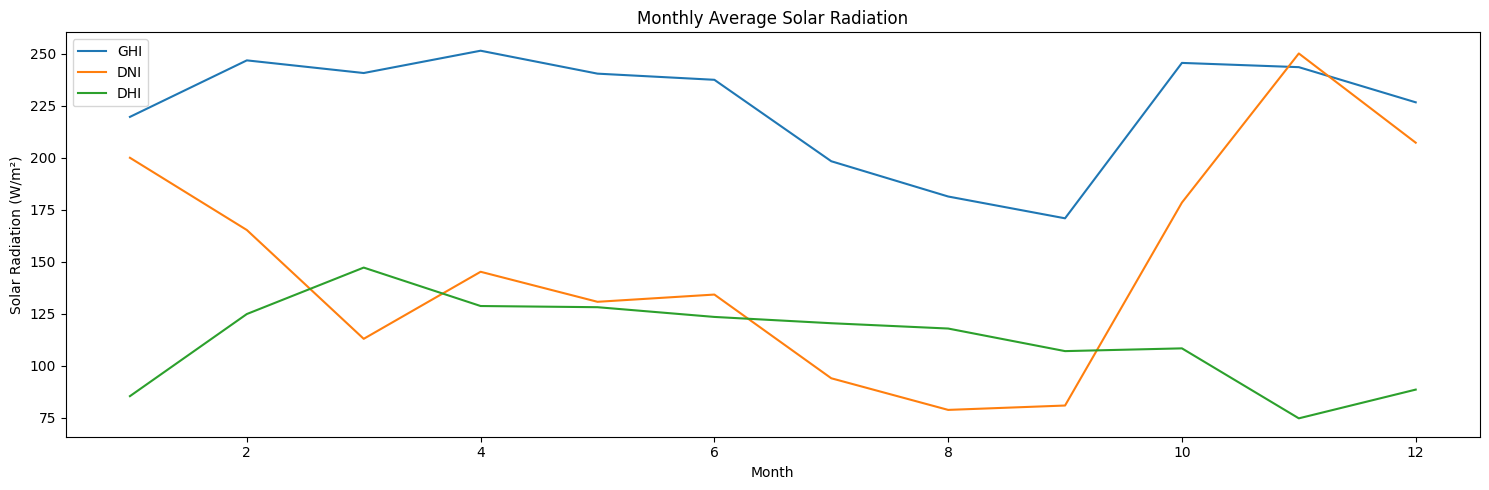

In [24]:
plt.figure(figsize=(15, 5))
# monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='bar')
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(monthly_avg.index, monthly_avg[col], label=col)
plt.title('Monthly Average Solar Radiation')
plt.xlabel('Month')
plt.ylabel('Solar Radiation (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/togo_monthly_avg_solar_radiation.png')
plt.show()

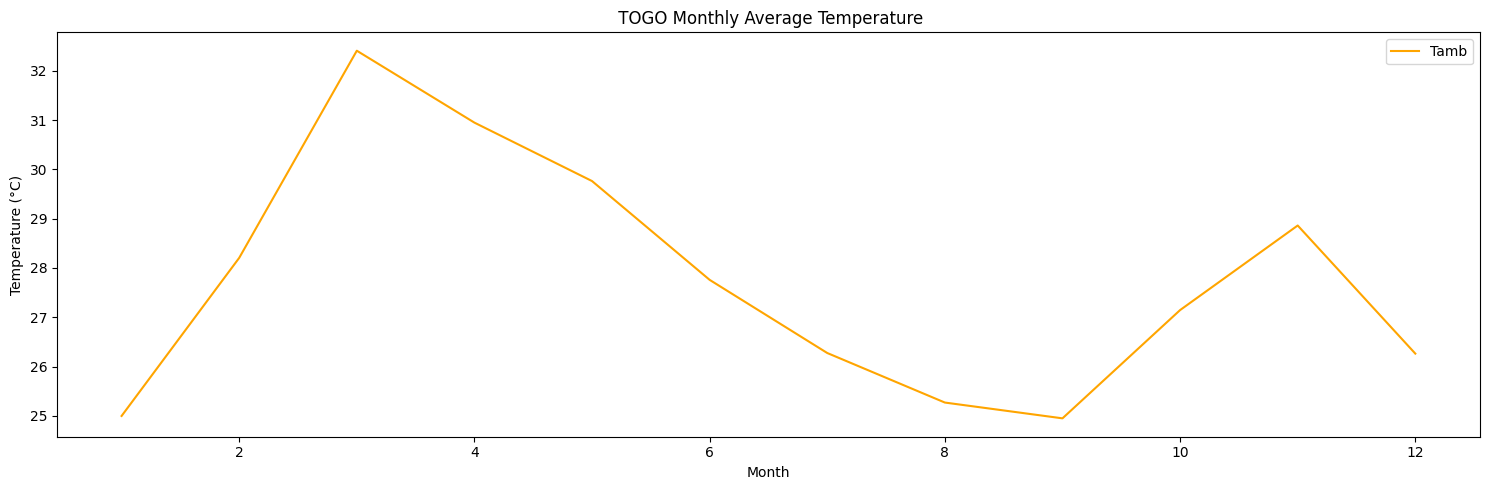

In [32]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg.index, monthly_avg['Tamb'], label='Tamb', color='orange')
plt.title(' TOGO Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/togo_monthly_avg_temperature.png')
plt.show()

###### cleaning Impact

In [26]:
module_avg= benin.groupby('Cleaning')[['ModA', 'ModB']].mean()

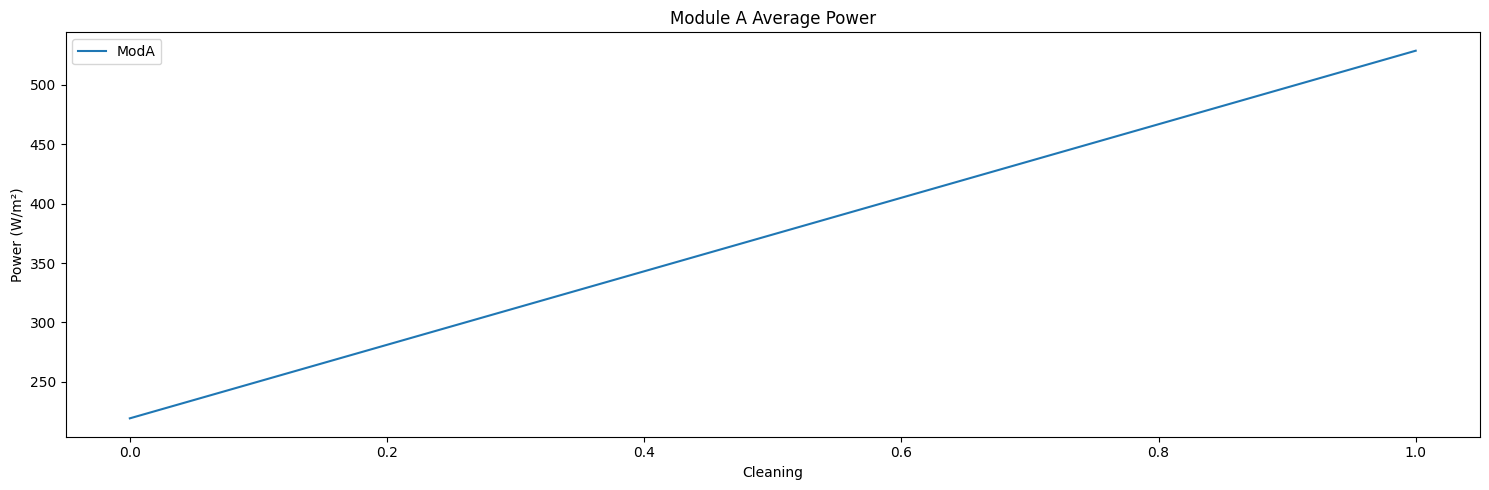

In [27]:
plt.figure(figsize=(15, 5))

plt.plot(module_avg.index, module_avg['ModA'], label='ModA')
plt.title('Module A Average Power')
plt.xlabel('Cleaning')
plt.ylabel('Power (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/togo_module_a_avg_power.png')
plt.show()

In [28]:
corr_cols =['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

In [29]:
benin[corr_cols].corr()

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.883698,0.855535,0.900081,0.920573
DNI,0.883698,1.000000,0.552447,0.774345,0.790686
DHI,0.855535,0.552447,1.000000,0.807604,0.826213
TModA,0.900081,0.774345,0.807604,1.000000,0.985075
TModB,0.920573,0.790686,0.826213,0.985075,1.000000


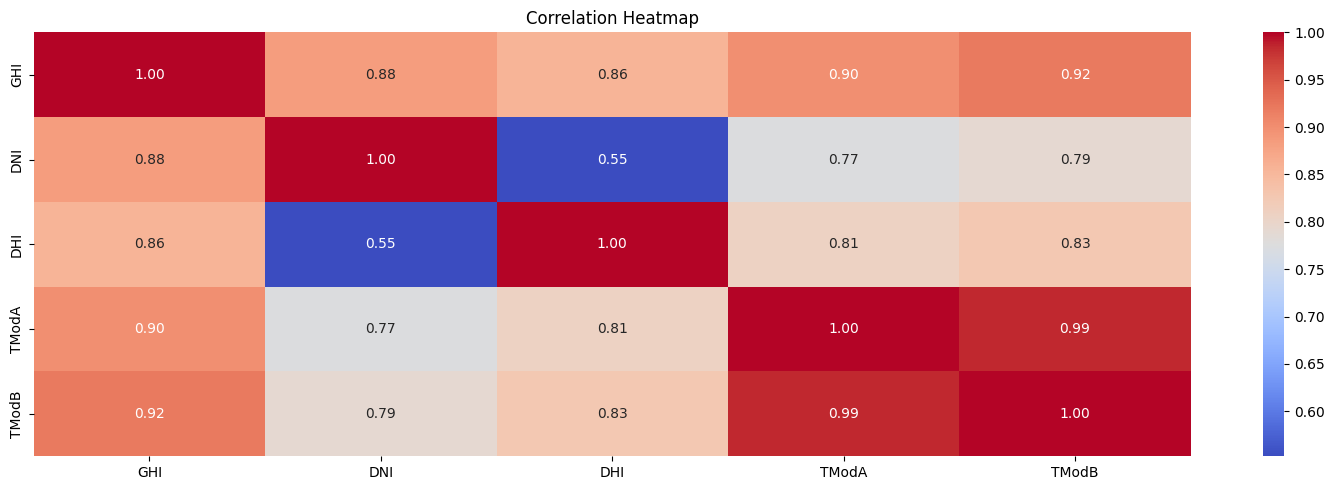

In [30]:
plt.figure(figsize=(15, 5))
sns.heatmap(benin[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../figures/togo_correlation_heatmap.png')
plt.show()

/tmp/ipykernel_75016/728543477.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


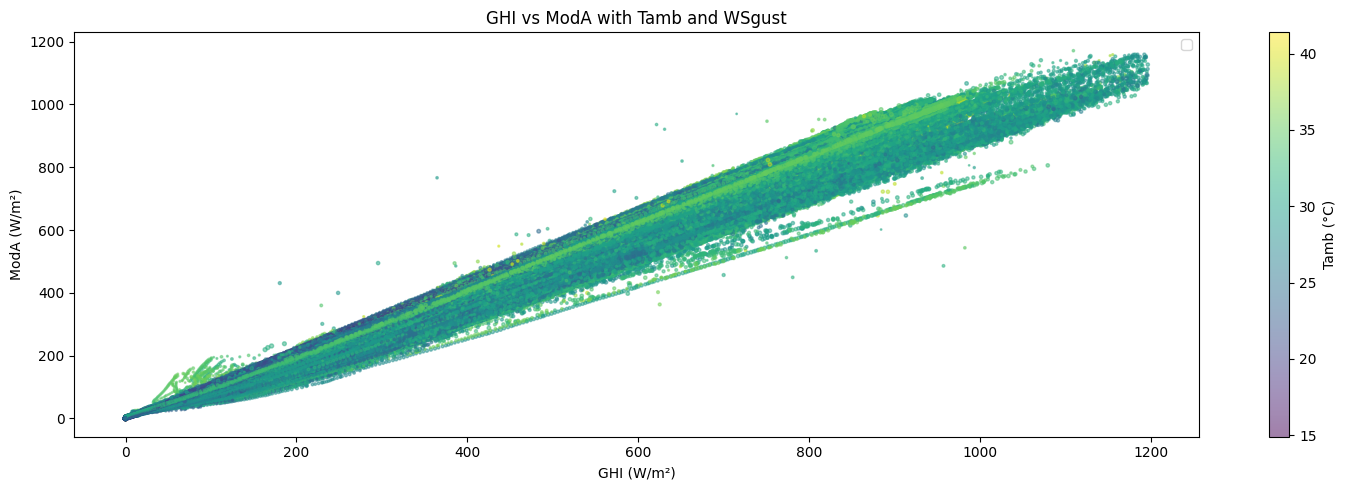

In [44]:
plt.figure(figsize=(15, 5))

plt.scatter(benin['GHI'], benin['ModA'],benin['WSgust'], alpha=0.5, c=benin['Tamb'], cmap='viridis')
plt.title('GHI vs ModA with Tamb and WSgust')
plt.xlabel('GHI (W/m²)')
plt.ylabel('ModA (W/m²)')
plt.colorbar(label='Tamb (°C)')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/togo_ghi_vs_modA.png')
plt.show()

/tmp/ipykernel_75508/2991081592.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='RH', y='Tamb', data=benin, palette='viridis', alpha=0.5)
/tmp/ipykernel_75508/2991081592.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/age/KAIM-Projects/solar-challenge-week1/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


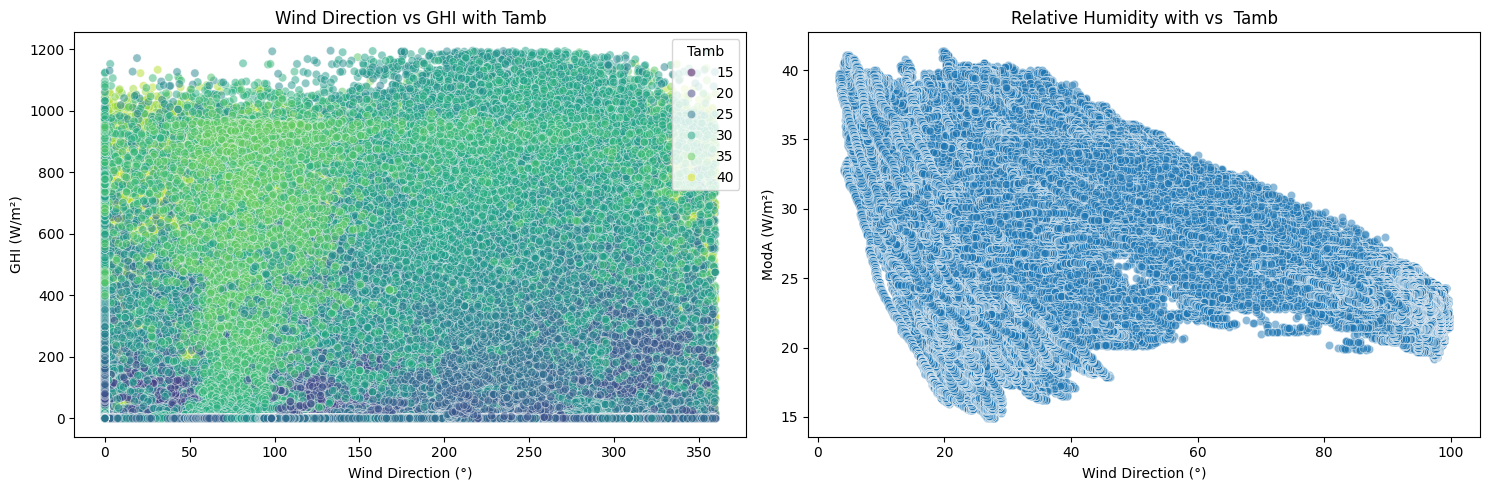

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='WD', y='GHI', data=benin, hue='Tamb', palette='viridis', alpha=0.5)
plt.title('Wind Direction vs GHI with Tamb')
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='Tamb', data=benin, palette='viridis', alpha=0.5)
plt.title('Relative Humidity with vs  Tamb')
plt.xlabel('Wind Direction (°)')
plt.ylabel('ModA (W/m²)')
plt.tight_layout()
plt.show()